In [77]:
import numpy as np
import matplotlib.pyplot as plt


In [78]:
a = -1
b = 1
k = 0.5
T = 0.4
phi = lambda x: abs(x)
g1 = lambda t: 1
g2 = lambda t: 1
f = lambda x, t: 0
h = 0.01
t = 0.5 * h * h / k

NK = int((b - a) / h) + 1 
NT = int(T / t) + 1

явная схема

In [79]:
def решить_левой_разностью():
    syst = np.zeros((NT, NK))
    syst[:, 0] = [g1(t) for t in np.linspace(0, T, NT)]
    syst[0, :] = [phi(x) for x in np.linspace(a, b, NK)]
    
    for i in range(1, NT):
        for j in range(1, NK - 1):
            xj = a + j*h
            syst[i][j] = k * syst[i-1][j+1]*t/(h*h) + \
                      (1 - 2*k*t/(h*h)) * syst[i-1][j] + \
                      k*syst[i-1][j-1]*t/(h*h) + \
                      t*f(xj, i*t)
        syst[i][-1] = syst[i][-2] + h * g2(t * i)
    return syst

def решить_ценральной_разностью():
    syst = np.zeros((NT, NK))
    syst[:, 0] = [g1(i) for i in np.linspace(0, T, NT)]
    syst[0, :] = [phi(i) for i in np.linspace(a, b, NK)]
    
    for i in range(1, NT):
        for j in range(1, NK - 1):
            xj = a + j*h
            syst[i][j] = k * syst[i-1][j+1]*t/(h*h) + \
                      (1 - 2*k*t/(h*h)) * syst[i-1][j] + \
                      k*syst[i-1][j-1]*t/(h*h) + \
                      t*f(xj, i*t)
        syst[i][-1] = syst[i][-3] + 2 * h * g2(t * i)
    return syst

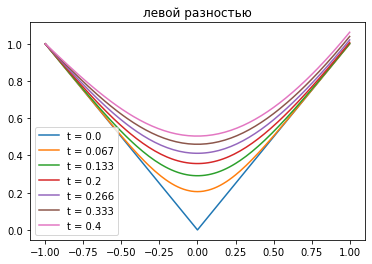

In [80]:
syst = решить_левой_разностью()
xs = np.linspace(a, b, NK)

for i in range(0, NT, NT//6):
    plt.plot(xs, syst[i], label=f't = {round(i*t, 3)}')
    plt.title("левой разностью")
plt.legend()
plt.show()

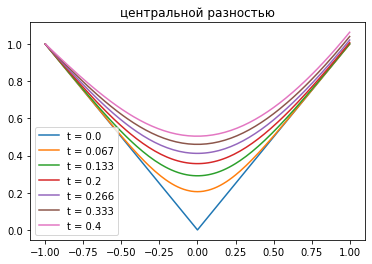

In [81]:
syst = решить_ценральной_разностью()
xs = np.linspace(a, b, NK)

for i in range(0, NT, NT//6):
    plt.plot(xs, syst[i], label=f't = {round(i*t, 3)}')
    plt.title("центральной разностью")
plt.legend()
plt.show()

In [82]:
tn1 = 25
tn2 = 75

ns = [10, 20, 40, 80, 160]
table = np.zeros(shape=(len(ns), 6))
t = 0.0001
for i in range(len(ns) - 1):

    h = (b - a) / ns[i]
    NK = ns[i]
    NT = int(T / t) + 1
    
    syst1 = решить_левой_разностью()
    
    h = (b - a) / ns[i + 1]
    NK = ns[i + 1]
    NT = int(T / t) + 1
    
    syst2 = решить_левой_разностью()
    
    sol1l = syst1[tn1]
    sol1c = syst2[tn1]
    sol2l = syst1[tn2]
    sol2c = syst2[tn2]
    
    table[i][0] = ns[i]
    table[i][1] = t
    table[i][2] = sum((sol1c[::2] - sol1l) ** 2)
    table[i][3] = sum((sol2c[::2] - sol2l) ** 2)
    table[i][4] = max(abs(sol1c[::2] - sol1l))
    table[i][5] = max(abs(sol2c[::2] - sol2l))

for i in range(len(table)):
    for j in range(len(table[i])):
        table[i][j] = round(table[i][j], 3)

print('N\t  t\t s(t=tn1) s(t=tn2) max(t=tn1) max(t=tn2)')
print(table)

N	  t	 s(t=tn1) s(t=tn2) max(t=tn1) max(t=tn2)
[[1.0e+01 0.0e+00 3.4e-02 3.2e-02 9.3e-02 9.2e-02]
 [2.0e+01 0.0e+00 1.7e-02 1.6e-02 4.8e-02 4.7e-02]
 [4.0e+01 0.0e+00 8.0e-03 8.0e-03 2.4e-02 2.4e-02]
 [8.0e+01 0.0e+00 4.0e-03 4.0e-03 1.2e-02 1.2e-02]
 [0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00]]


In [83]:
# явная схема, центральная разность
    
tn1 = 25
tn2 = 75

ns = [10, 20, 40, 80, 160]
table = np.zeros(shape=(len(ns), 6))
t = 0.0001
for i in range(len(ns) - 1):

    h = (b - a) / ns[i]
    NK = ns[i]
    NT = int(T / t) + 1
    
    syst1 = решить_ценральной_разностью()
    
    h = (b - a) / ns[i + 1]
    NK = ns[i + 1]
    NT = int(T / t) + 1
    
    syst2 = решить_ценральной_разностью()
    
    sol1l = syst1[tn1]
    sol1c = syst2[tn1]
    sol2l = syst1[tn2]
    sol2c = syst2[tn2]
    
    table[i][0] = ns[i]
    table[i][1] = t
    table[i][2] = sum((sol1c[::2] - sol1l) ** 2)
    table[i][3] = sum((sol2c[::2] - sol2l) ** 2)
    table[i][4] = max(abs(sol1c[::2] - sol1l))
    table[i][5] = max(abs(sol2c[::2] - sol2l))

for i in range(len(table)):
    for j in range(len(table[i])):
        table[i][j] = round(table[i][j], 3)

print('N\t  t\t s(t=tn1) s(t=tn2) max(t=tn1) max(t=tn2)')
print(table)

N	  t	 s(t=tn1) s(t=tn2) max(t=tn1) max(t=tn2)
[[1.0e+01 0.0e+00 3.0e-02 2.9e-02 9.2e-02 9.0e-02]
 [2.0e+01 0.0e+00 1.6e-02 1.6e-02 4.7e-02 4.6e-02]
 [4.0e+01 0.0e+00 8.0e-03 8.0e-03 2.4e-02 2.3e-02]
 [8.0e+01 0.0e+00 4.0e-03 4.0e-03 1.2e-02 1.2e-02]
 [0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00]]


неявная схема

In [37]:
def решить_левой_разностью():
    syst = np.zeros((NT, NK))
    syst[:, 0] = [g1(i) for i in np.linspace(0, T, NT)]
    syst[0, :] = [phi(i) for i in np.linspace(a, b, NK)]
    
    for i in range(1, NT):
        syst2 = np.zeros((NK-1, NK-1))
        ys = np.zeros(NK-1)
        syst2[0][0] = -(1 + 2 * k * t / (h*h))
        syst2[0][1] = t * k / (h*h)
        ys[0] = -(syst[i-1][1] + t*f(a + i*h, i*t) + k * t * syst[i][0]/(h*h))
        
        for j in range(1, NK-2):
            syst2[j][j-1] = k * t/(h*h)
            syst2[j][j] = -(1 + 2 * k * t/(h*h))
            syst2[j][j+1] = k * t/(h*h)
            ys[j] = -(syst[i-1][j+1] + t*f(a + j*h, i*t))
        
        syst2[-1][-1] = -1
        syst2[-1][-2] = 1
        ys[-1] = h * g2(t * i)
        
        syst[i, 1:] = np.linalg.solve(syst2, ys)
    return syst

def решить_ценральной_разностью():
    syst = np.zeros((NT, NK))
    syst[:, 0] = [g1(i) for i in np.linspace(0, T, NT)]
    syst[0, :] = [phi(i) for i in np.linspace(a, b, NK)]
    
    for i in range(1, NT):
        syst2 = np.zeros((NK-1, NK-1))
        ys = np.zeros(NK-1)
        syst2[0][0] = -(1 + 2 * k * t / (h*h))
        syst2[0][1] = t * k / (h*h)
        ys[0] = -(syst[i-1][1] + t*f(a + i*h, i*t) + k * t * syst[i][0]/(h*h))
        
        for j in range(1, NK-2):
            syst2[j][j-1] = k * t/(h*h)
            syst2[j][j] = -(1 + 2 * k * t/(h*h))
            syst2[j][j+1] = k * t/(h*h)
            ys[j] = -(syst[i-1][j+1] + t*f(a + j*h, i*t))
        
        syst2[-1][-1] = -1
        syst2[-1][-3] = 1
        ys[-1] = 2 * h * g2(t * i)
        
        syst[i, 1:] = np.linalg.solve(syst2, ys)
    return syst

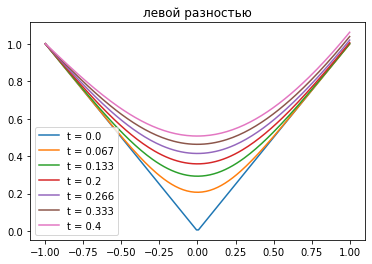

In [84]:
syst = решить_левой_разностью()
xs = np.linspace(a, b, NK)

for i in range(0, NT, NT//6):
    plt.plot(xs, syst[i], label=f't = {round(i*t, 3)}')
    plt.title("левой разностью")
plt.legend()
plt.show()

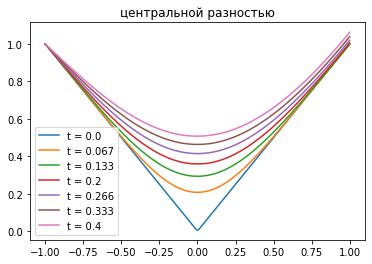

In [85]:
syst = решить_ценральной_разностью()
xs = np.linspace(a, b, NK)

for i in range(0, NT, NT//6):
    plt.plot(xs, syst[i], label=f't = {round(i*t, 3)}')
    plt.title("центральной разностью")
plt.legend()
plt.show()

In [86]:
tn1 = 25
tn2 = 75

ns = [10, 20, 40, 80, 160]
table = np.zeros(shape=(len(ns), 6))
t = 0.0001
for i in range(len(ns) - 1):

    h = (b - a) / ns[i]
    NK = ns[i]
    NT = int(T / t) + 1
    
    syst1 = решить_левой_разностью()
    
    h = (b - a) / ns[i + 1]
    NK = ns[i + 1]
    NT = int(T / t) + 1
    
    syst2 = решить_левой_разностью()
    
    sol1l = syst1[tn1]
    sol1c = syst2[tn1]
    sol2l = syst1[tn2]
    sol2c = syst2[tn2]
    
    table[i][0] = ns[i]
    table[i][1] = t
    table[i][2] = sum((sol1c[::2] - sol1l) ** 2)
    table[i][3] = sum((sol2c[::2] - sol2l) ** 2)
    table[i][4] = max(abs(sol1c[::2] - sol1l))
    table[i][5] = max(abs(sol2c[::2] - sol2l))

for i in range(len(table)):
    for j in range(len(table[i])):
        table[i][j] = round(table[i][j], 3)

print('N\t  t\t s(t=tn1) s(t=tn2) max(t=tn1) max(t=tn2)')
print(table)

N	  t	 s(t=tn1) s(t=tn2) max(t=tn1) max(t=tn2)
[[1.0e+01 0.0e+00 3.4e-02 3.2e-02 9.3e-02 9.2e-02]
 [2.0e+01 0.0e+00 1.7e-02 1.6e-02 4.8e-02 4.7e-02]
 [4.0e+01 0.0e+00 8.0e-03 8.0e-03 2.4e-02 2.4e-02]
 [8.0e+01 0.0e+00 4.0e-03 4.0e-03 1.2e-02 1.2e-02]
 [0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00]]


In [87]:
# неявная схема, центральная разность
    
tn1 = 25
tn2 = 75

ns = [10, 20, 40, 80, 160]
table = np.zeros(shape=(len(ns), 6))
t = 0.0001
for i in range(len(ns) - 1):

    h = (b - a) / ns[i]
    NK = ns[i]
    NT = int(T / t) + 1
    
    syst1 = решить_ценральной_разностью()
    
    h = (b - a) / ns[i + 1]
    NK = ns[i + 1]
    NT = int(T / t) + 1
    
    syst2 = решить_ценральной_разностью()
    
    sol1l = syst1[tn1]
    sol1c = syst2[tn1]
    sol2l = syst1[tn2]
    sol2c = syst2[tn2]
    
    table[i][0] = ns[i]
    table[i][1] = t
    table[i][2] = sum((sol1c[::2] - sol1l) ** 2)
    table[i][3] = sum((sol2c[::2] - sol2l) ** 2)
    table[i][4] = max(abs(sol1c[::2] - sol1l))
    table[i][5] = max(abs(sol2c[::2] - sol2l))

for i in range(len(table)):
    for j in range(len(table[i])):
        table[i][j] = round(table[i][j], 3)

print('N\t  t\t s(t=tn1) s(t=tn2) max(t=tn1) max(t=tn2)')
print(table)

N	  t	 s(t=tn1) s(t=tn2) max(t=tn1) max(t=tn2)
[[1.0e+01 0.0e+00 3.0e-02 2.9e-02 9.2e-02 9.0e-02]
 [2.0e+01 0.0e+00 1.6e-02 1.6e-02 4.7e-02 4.6e-02]
 [4.0e+01 0.0e+00 8.0e-03 8.0e-03 2.4e-02 2.3e-02]
 [8.0e+01 0.0e+00 4.0e-03 4.0e-03 1.2e-02 1.2e-02]
 [0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00]]
